<a href="https://colab.research.google.com/github/gitcnk/covid_experiment/blob/main/covid_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(ggplot2)
library(dplyr)

# read data
covid_clean <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/refs/heads/master/Stat254/covid_clean.csv')


In [3]:
# Data prep for the heatmap

tiny_data  <- covid_clean %>%
                filter(age < 90)

tiny_data %>%
  group_by(diabetes, hypertension,
           obesity, pneumonia, age) %>%
  summarise('sample_size' = n(),
            'icu_count' = sum(ICU_status),
            'icu_percent' = sum(ICU_status)/n()) -> icu_percent_data


icu_percent_data %>%
          na.omit() -> icu_percent_data



bucket_code <- as.numeric(icu_percent_data$diabetes) - 1 +
               as.numeric(icu_percent_data$hypertension) - 1 +
               as.numeric(icu_percent_data$obesity) - 1 +
               as.numeric(icu_percent_data$pneumonia) - 1

icu_percent_data$bucket_code <- bucket_code


myf <- function(x)
{
  out <- (as.character(x) )

  return(toString(out))
}




icu_percent_data$bucket_id <- apply(icu_percent_data[, 1:4], MARGIN = 1, FUN = myf)

icu_percent_data %>%
  group_by(bucket_id) %>%
  summarise(n())



`summarise()` has grouped output by 'diabetes', 'hypertension', 'obesity',
'pneumonia'. You can override using the `.groups` argument.
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”


bucket_id,n()
<chr>,<int>
"No, No, No, No",90
"No, No, No, Yes",90
"No, No, Yes, No",87
"No, No, Yes, Yes",88
"No, Yes, No, No",85
"No, Yes, No, Yes",84
"No, Yes, Yes, No",74
"No, Yes, Yes, Yes",73
"Yes, No, No, No",85


## Heatmap


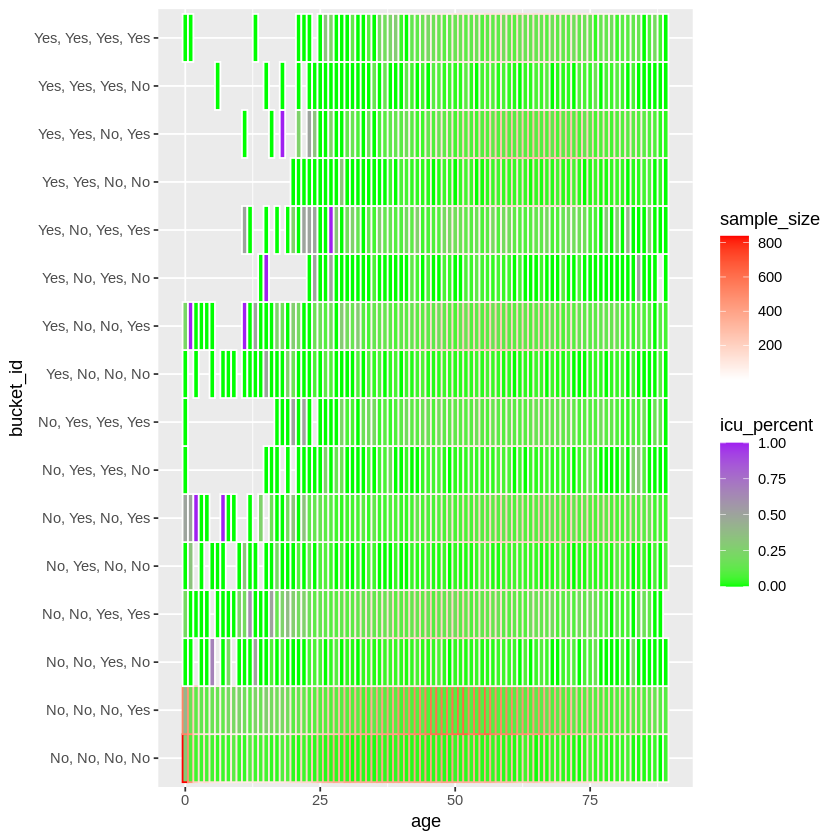

In [5]:
# Heatmap


icu_percent_data %>%
  ggplot() +
  aes(x = age ,
      y = bucket_id,
      fill = icu_percent,
      col = sample_size) +
  geom_tile( linewidth = 0.5) +
  scale_fill_continuous(low = 'green', high = 'purple') +
  scale_color_continuous(low = 'white', high = 'red')